In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import hvplot.pandas
from scipy.stats import linregress


In [100]:
# Reads the data that will be used 

data_csv = pd.read_csv("Resources/500_Cities__Coronary_heart_disease_among_adults_aged___18_years_20240317.csv")

data_csv.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,%,...,4.8,NaN,NaN,144186,"(37.6329591551, -122.077051051)",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
1,2017,AL,Alabama,Huntsville,City,BRFSS,Health Outcomes,0137000,Coronary heart disease among adults aged >=18 ...,%,...,6.8,NaN,NaN,180105,"(34.6989692671, -86.6387042882)",HLTHOUT,CHD,137000.0,NaN,Coronary Heart Disease
2,2017,AZ,Arizona,Chandler,City,BRFSS,Health Outcomes,0412000,Coronary heart disease among adults aged >=18 ...,%,...,3.9,NaN,NaN,236123,"(33.28318981, -111.852210033)",HLTHOUT,CHD,412000.0,NaN,Coronary Heart Disease
3,2017,AZ,Arizona,Surprise,City,BRFSS,Health Outcomes,0471510,Coronary heart disease among adults aged >=18 ...,%,...,6.1,NaN,NaN,117517,"(33.6803835177, -112.452218439)",HLTHOUT,CHD,471510.0,NaN,Coronary Heart Disease
4,2017,CA,California,Bellflower,City,BRFSS,Health Outcomes,0604982,Coronary heart disease among adults aged >=18 ...,%,...,5.4,NaN,NaN,76616,"(33.8880417923, -118.127100236)",HLTHOUT,CHD,604982.0,NaN,Coronary Heart Disease


In [17]:
# Shows all the unique values under the State Description column

data_csv['StateDesc'].unique()

array(['California', 'Alabama', 'Arizona', 'District of C', 'Florida',
       'Colorado', 'Kansas', 'Illinois', 'Kentucky', 'Maine',
       'Massachusetts', 'Michigan', 'North Carolin', 'North Dakota',
       'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolin', 'Tennessee',
       'Texas', 'Utah', 'Washington', 'Wisconsin', 'Alaska',
       'United States', 'Arkansas', 'Connecticut', 'Delaware', 'Nebraska',
       'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Louisiana',
       'Maryland', 'New Mexico', 'Minnesota', 'Nevada', 'Mississippi',
       'Missouri', 'Montana', 'New Jersey', 'New Hampshire', 'New York',
       'Rhode Island', 'Oregon', 'South Dakota', 'Virginia', 'Vermont',
       'West Virginia', 'Wyoming'], dtype=object)

In [18]:
# Drops District of Columbia from the State Description column

states_df = data_csv.drop(data_csv.loc[data_csv['StateDesc'] == 'District of C', :].index)

states_df.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,%,...,4.8,NaN,NaN,144186,"(37.6329591551, -122.077051051)",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
1,2017,AL,Alabama,Huntsville,City,BRFSS,Health Outcomes,0137000,Coronary heart disease among adults aged >=18 ...,%,...,6.8,NaN,NaN,180105,"(34.6989692671, -86.6387042882)",HLTHOUT,CHD,137000.0,NaN,Coronary Heart Disease
2,2017,AZ,Arizona,Chandler,City,BRFSS,Health Outcomes,0412000,Coronary heart disease among adults aged >=18 ...,%,...,3.9,NaN,NaN,236123,"(33.28318981, -111.852210033)",HLTHOUT,CHD,412000.0,NaN,Coronary Heart Disease
3,2017,AZ,Arizona,Surprise,City,BRFSS,Health Outcomes,0471510,Coronary heart disease among adults aged >=18 ...,%,...,6.1,NaN,NaN,117517,"(33.6803835177, -112.452218439)",HLTHOUT,CHD,471510.0,NaN,Coronary Heart Disease
4,2017,CA,California,Bellflower,City,BRFSS,Health Outcomes,0604982,Coronary heart disease among adults aged >=18 ...,%,...,5.4,NaN,NaN,76616,"(33.8880417923, -118.127100236)",HLTHOUT,CHD,604982.0,NaN,Coronary Heart Disease


In [19]:
# Drops United States from the State Description column
states_df = states_df.drop(states_df.loc[states_df['StateDesc'] == 'United States', :].index)

# Shows the unique amount of values in the State Description column 
states_df['StateDesc'].nunique()

50

In [20]:
states_df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [21]:
# Makes dataframe containing only the most important columns 

reduced_states_df = states_df[['StateDesc', 'CityName', 'Data_Value_Type', 'Data_Value', 'PopulationCount', 'GeoLocation']]

reduced_states_df.head()

,StateDesc,CityName,Data_Value_Type,Data_Value,PopulationCount,GeoLocation
0,California,Hayward,Age-adjusted prevalence,4.8,144186,"(37.6329591551, -122.077051051)"
1,Alabama,Huntsville,Crude prevalence,6.7,180105,"(34.6989692671, -86.6387042882)"
2,Arizona,Chandler,Crude prevalence,3.8,236123,"(33.28318981, -111.852210033)"
3,Arizona,Surprise,Crude prevalence,5.9,117517,"(33.6803835177, -112.452218439)"
4,California,Bellflower,Age-adjusted prevalence,5.3,76616,"(33.8880417923, -118.127100236)"


In [22]:
# Removes any rows with NA in "Data_Value" column
reduced_states_df = reduced_states_df[reduced_states_df["Data_Value"].notna()]



In [23]:
# Copies dataframe and extracts Longitude and latitude data from dataframe
reduced_coordinates_df = reduced_states_df.copy()
reduced_coordinates_df[["Lat","Long"]] = reduced_coordinates_df['GeoLocation'].str.split(",", expand = True)
reduced_coordinates_df['Lat'] = reduced_coordinates_df['Lat'].str.removeprefix("(")
reduced_coordinates_df['Long'] = reduced_coordinates_df['Long'].str.removesuffix(")")


# Converts longitude and latitude columns into float and plots on map 
reduced_coordinates_df['Long'] = reduced_coordinates_df['Long'].astype(float) 
reduced_coordinates_df['Lat'] = reduced_coordinates_df['Lat'].astype(float)
reduced_coordinates_df.hvplot.points('Long','Lat', geo = True, tiles = 'OSM', size = 'Data_Value')


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Data_Value)

In [24]:
# Groups by state and finds the average latitude, longitude, and data value for each
state_reduced_coordinates = reduced_coordinates_df.groupby('StateDesc')[['Data_Value', 'Lat','Long']].mean()

# Converts it to dataframe
state_reduced_coordinates_df = state_reduced_coordinates.reset_index()

# Creates new column in this dataframe
state_reduced_coordinates_df['category'] = " "

# Sorts the dataframe in descending order based on data values 
state_reduced_coordinates_df = state_reduced_coordinates_df.sort_values(by = "Data_Value", ascending = False)
counter = 1

# Color codes the top 10 highest data values as red and the rest as green
for index, row in state_reduced_coordinates_df.iterrows():
    if counter <= 10:
        state_reduced_coordinates_df.loc[index, 'category'] = 'red'
        counter = counter + 1
    else:
        state_reduced_coordinates_df.loc[index, 'category'] = 'green'
        counter = counter + 1

# Plots the  points on a map 
state_reduced_coordinates_df.hvplot.points('Long','Lat', color='category', geo = True,
                                     tiles = 'OSM', hover_cols = ['Long','Lat','StateDesc','category'])

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (category,StateDesc)

In [25]:
# Groups by each state and finds the average data value for each state
average_value = reduced_states_df.groupby("StateDesc")['Data_Value'].mean()

average_df = average_value.reset_index()

# Makes dataframe with values sorted in descending order 
sorted_average_df = average_df.sort_values(by = 'Data_Value',ascending = False)

sorted_average_df.head()

,StateDesc,Data_Value
47,West Virginia,8.525000
34,Ohio,7.517759
21,Michigan,7.482011
16,Kentucky,7.015789
0,Alabama,6.912325


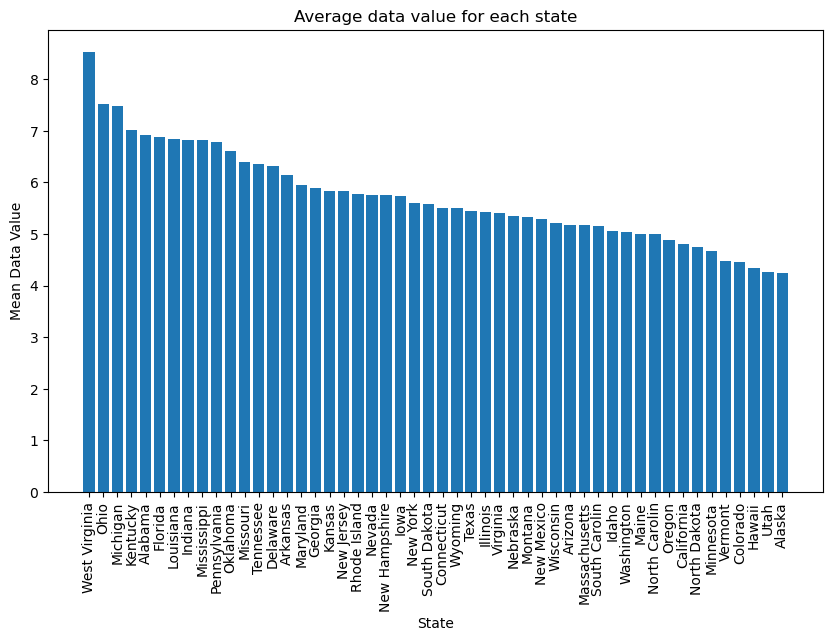

In [26]:
# Bar plot of the average data value for each state

plt.figure(figsize=(10, 6))
plt.bar(sorted_average_df['StateDesc'], sorted_average_df['Data_Value'])
plt.xticks(fontsize = 10, rotation = "vertical")
plt.ylabel("Mean Data Value")
plt.xlabel("State")
plt.title("Average data value for each state")
plt.show()

In [27]:
# Groups by state and the data value type and finds the average data value for each unique grouping

state_data_type = reduced_states_df.groupby(['StateDesc','Data_Value_Type'])['Data_Value'].mean()
state_data_type

StateDesc      Data_Value_Type        
Alabama        Age-adjusted prevalence    6.583333
               Crude prevalence           6.917949
Alaska         Age-adjusted prevalence    5.000000
               Crude prevalence           4.235714
Arizona        Age-adjusted prevalence    5.208333
                                            ...   
West Virginia  Crude prevalence           8.586957
Wisconsin      Age-adjusted prevalence    5.485714
               Crude prevalence           5.205160
Wyoming        Age-adjusted prevalence    5.200000
               Crude prevalence           5.523529
Name: Data_Value, Length: 100, dtype: float64

In [28]:
# Converts the series into a dataframe

state_data_type_df = state_data_type.reset_index()
state_data_type_df.head()

,StateDesc,Data_Value_Type,Data_Value
0,Alabama,Age-adjusted prevalence,6.583333
1,Alabama,Crude prevalence,6.917949
2,Alaska,Age-adjusted prevalence,5.000000
3,Alaska,Crude prevalence,4.235714
4,Arizona,Age-adjusted prevalence,5.208333


In [29]:
# Makes a dataframe for each data value type (age adjusted and crude) 

age_adjusted_df = state_data_type_df.loc[state_data_type_df['Data_Value_Type'] == 'Age-adjusted prevalence',:]
crude_df = state_data_type_df.loc[state_data_type_df['Data_Value_Type'] == 'Crude prevalence',:]

crude_df.head()

,StateDesc,Data_Value_Type,Data_Value
1,Alabama,Crude prevalence,6.917949
3,Alaska,Crude prevalence,4.235714
5,Arizona,Crude prevalence,5.180336
7,Arkansas,Crude prevalence,6.133333
9,California,Crude prevalence,4.793694


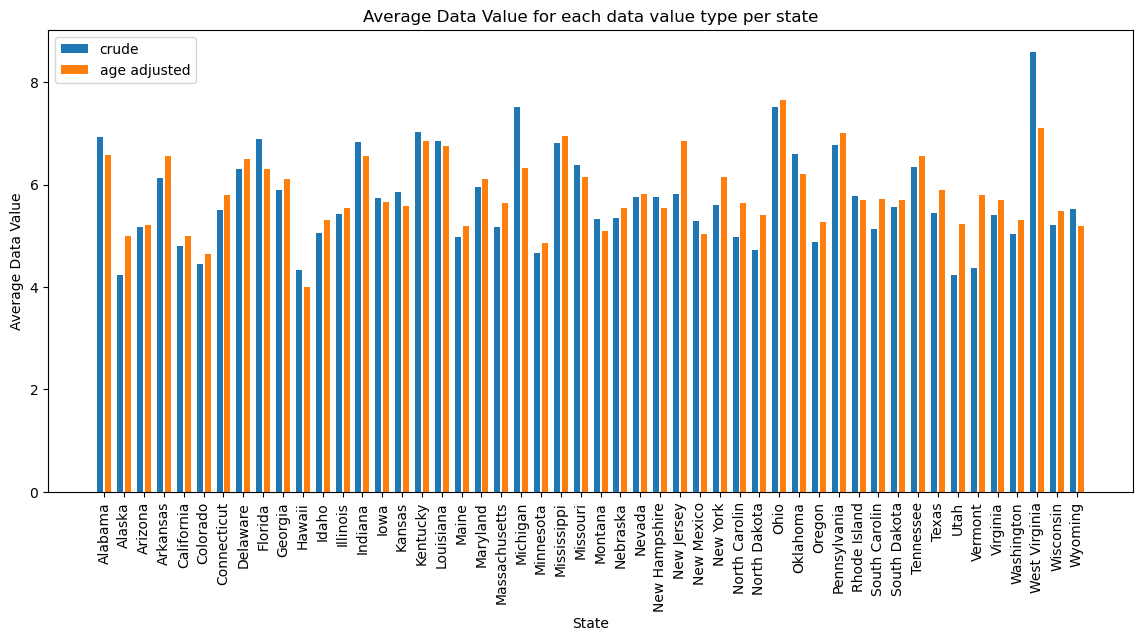

In [30]:
# Plots a bar of average values for each data value type per state 

state_names = crude_df['StateDesc']

crude_bar = crude_df['Data_Value']
age_adjusted_bar = age_adjusted_df['Data_Value']
  
X_axis = np.arange(len(state_names)) 
  
plt.figure(figsize=(14, 6))
plt.bar(X_axis - 0.2, crude_bar, 0.3, label = 'crude') 
plt.bar(X_axis + 0.2, age_adjusted_bar, 0.3, label = 'age adjusted') 
plt.legend()  
plt.xticks(X_axis, state_names, fontsize = 10, rotation = "vertical") 
plt.xlabel("State")
plt.ylabel("Average Data Value")
plt.title("Average Data Value for each data value type per state")

plt.show()

In [101]:
states_df.to_csv("Resources/states_df.csv", index = False)

In [32]:
# Reads in the obesity and inactivity dataframe
obesity_data = pd.read_csv("Resources/state_inactivity_obesity_source_data.csv")

obesity_data['Obesity_Percentage'] = obesity_data['Obesity_Percentage'].astype(float) * 100
obesity_data['Inactivity_Percentage'] = obesity_data['Inactivity_Percentage'].astype(float) * 100
obesity_data.head()

,StateDesc,Obesity_Percentage,Inactivity_Percentage
0,Alabama,37.693682,33.946511
1,Alaska,34.165793,21.009666
2,Arizona,29.421766,25.250418
3,Arkansas,33.130379,32.360820
4,California,24.780939,21.399161


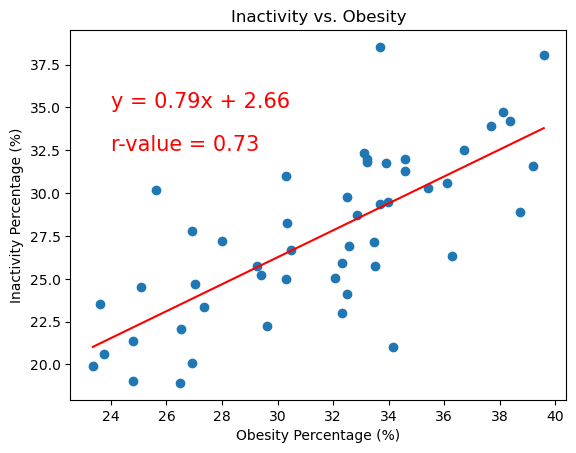

In [33]:
# Shows a scatterplot between inactivity and obesity
plt.scatter(obesity_data['Obesity_Percentage'], obesity_data['Inactivity_Percentage'])
plt.xlabel('Obesity Percentage (%)')
plt.ylabel('Inactivity Percentage (%)')
plt.title('Inactivity vs. Obesity')

# Calculates slope, intercept, rval, pval, and std
slope, intercept, rval, pval, std = linregress(obesity_data['Obesity_Percentage'], obesity_data['Inactivity_Percentage'])

# Creates strings that will be shown in the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_value_text = f'r-value = {rval:.2f}'

# Creates an array of the maximum and minimum x-values
x_min = obesity_data['Obesity_Percentage'].astype(float).min()
x_max = obesity_data['Obesity_Percentage'].astype(float).max()
x_values = x_min, x_max
x_values_array = np.array(x_values)

# Predicts y-values using the linear regression equation
y_pred = slope * x_values_array + intercept

# Plots the linear regression line and shows the string values determined above
plt.plot(x_values_array, y_pred, c = 'r')
plt.text(x = 24, y = 35, fontsize = 15, s = equation, c = 'r')
plt.text(x = 24, y = 32.5, fontsize = 15, s = r_value_text, c = 'r') 
plt.show()

In [82]:
remove_dup_state_city = reduced_states_df.groupby(['StateDesc', 'CityName'])['Data_Value'].mean()
remove_dup_state_city_df = remove_dup_state_city.reset_index()


In [84]:
city_county_df = pd.read_csv("Resources/uscities.csv")


reduced_city_county_df = city_county_df[['city','county_name','state_name']]

reduced_city_county_df = reduced_city_county_df.rename(columns = {'city':'CityName',
                                                                      'state_name': 'StateDesc'})

dup_city_county = reduced_city_county_df.duplicated()
dup_city_county_index = reduced_city_county_df[dup_city_county].index
removed_duplicate_city_county_df = reduced_city_county_df.drop(dup_city_county_index)


county_info_df = pd.merge(remove_dup_state_city_df, removed_duplicate_city_county_df, on = ['StateDesc','CityName'], how = 'left')

county_info_df.head()

,StateDesc,CityName,Data_Value,county_name
0,Alabama,Birmingham,7.136957,Jefferson
1,Alabama,Hoover,4.920000,Jefferson
2,Alabama,Huntsville,6.821667,Madison
3,Alabama,Mobile,7.879221,Mobile
4,Alabama,Montgomery,7.037097,Montgomery


In [88]:
per_county = county_info_df.groupby('county_name')['Data_Value'].mean()
per_county_df = per_county.reset_index()
per_county_df.head()

,county_name,Data_Value
0,Ada,4.430000
1,Adams,4.091218
2,Alachua,5.025641
3,Alameda,4.160698
4,Albany,5.442857
